In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-exercise-data/megaGymDataset.csv


In [2]:
df= pd.read_csv('/kaggle/input/gym-exercise-data/megaGymDataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [4]:
df.shape

(2918, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [6]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [7]:
df.isnull().sum()

Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:>

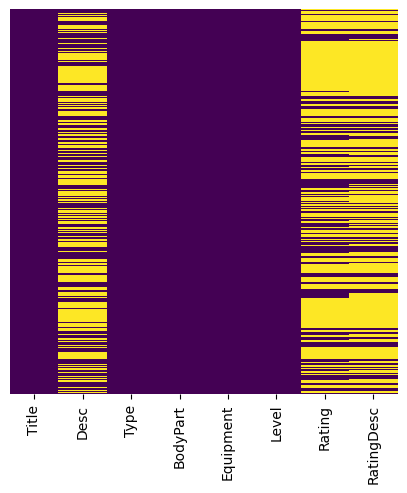

In [9]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 0, 'Types of Exercises')

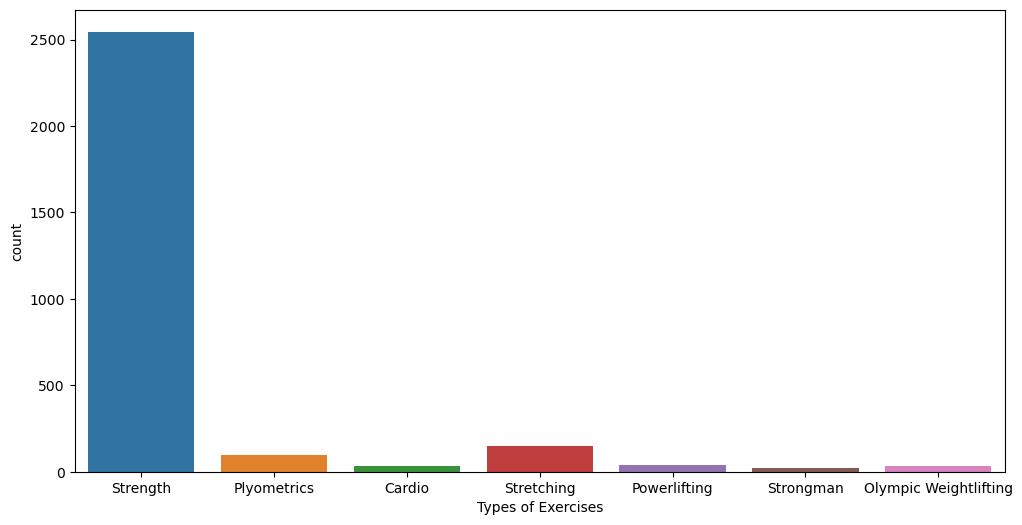

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Type',data=df)
plt.xlabel("Types of Exercises")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Abdominals'),
  Text(1, 0, 'Adductors'),
  Text(2, 0, 'Abductors'),
  Text(3, 0, 'Biceps'),
  Text(4, 0, 'Calves'),
  Text(5, 0, 'Chest'),
  Text(6, 0, 'Forearms'),
  Text(7, 0, 'Glutes'),
  Text(8, 0, 'Hamstrings'),
  Text(9, 0, 'Lats'),
  Text(10, 0, 'Lower Back'),
  Text(11, 0, 'Middle Back'),
  Text(12, 0, 'Traps'),
  Text(13, 0, 'Neck'),
  Text(14, 0, 'Quadriceps'),
  Text(15, 0, 'Shoulders'),
  Text(16, 0, 'Triceps')])

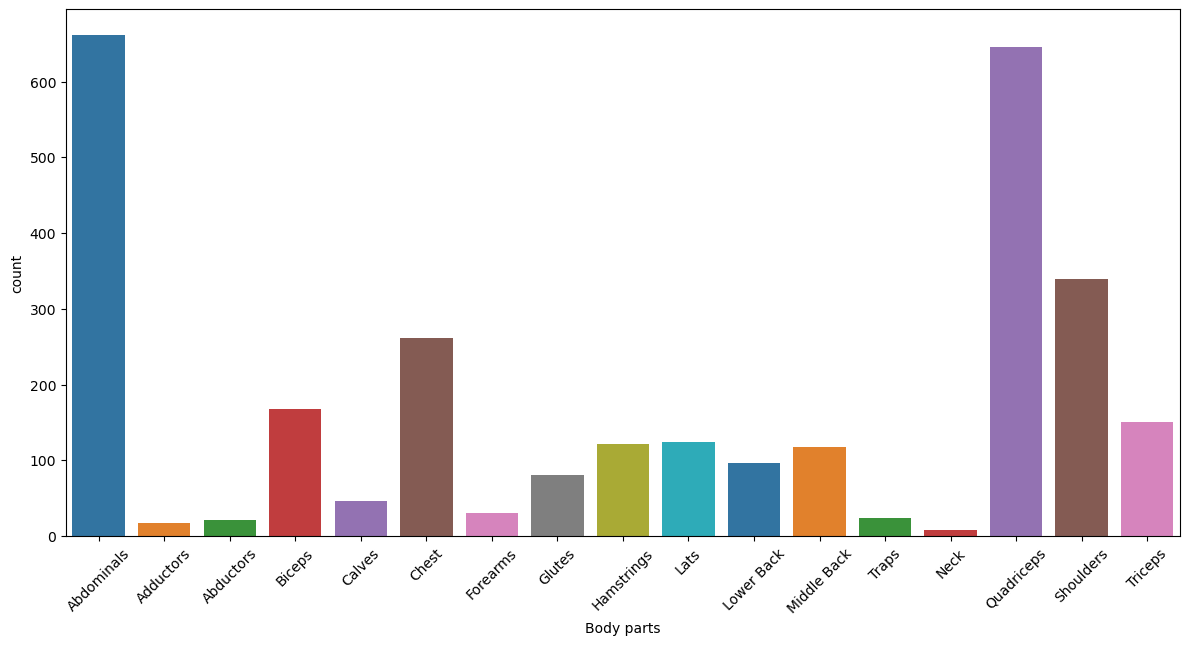

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='BodyPart',data=df,palette='tab10')
plt.xlabel("Body parts")
plt.tight_layout()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Bands'),
  Text(1, 0, 'Barbell'),
  Text(2, 0, 'Kettlebells'),
  Text(3, 0, 'Dumbbell'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Cable'),
  Text(6, 0, 'Machine'),
  Text(7, 0, 'Body Only'),
  Text(8, 0, 'Medicine Ball'),
  Text(9, 0, 'None'),
  Text(10, 0, 'Exercise Ball'),
  Text(11, 0, 'Foam Roll'),
  Text(12, 0, 'E-Z Curl Bar')])

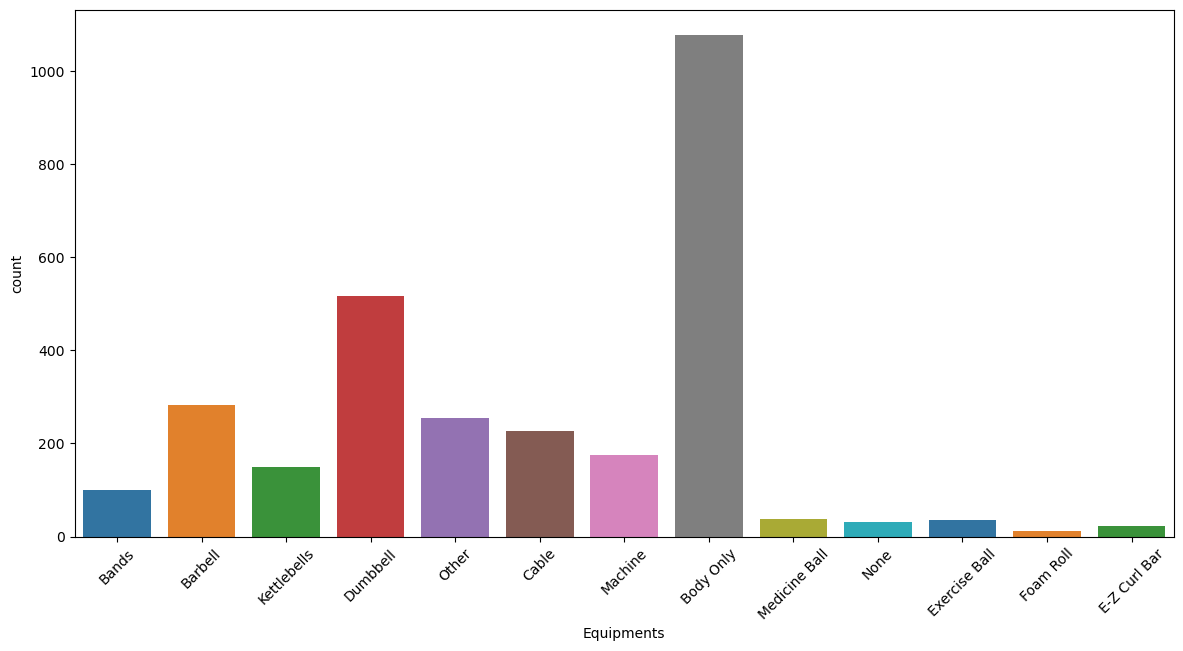

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Equipment',data=df,palette='tab10')
plt.xlabel("Equipments")
plt.tight_layout()
plt.xticks(rotation=45)

In [13]:
abex=df[df.BodyPart=='Abdominals']
abex.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bands'),
  Text(1, 0, 'Barbell'),
  Text(2, 0, 'Kettlebells'),
  Text(3, 0, 'Dumbbell'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Cable'),
  Text(6, 0, 'Machine'),
  Text(7, 0, 'Body Only'),
  Text(8, 0, 'Medicine Ball'),
  Text(9, 0, 'None'),
  Text(10, 0, 'Exercise Ball')])

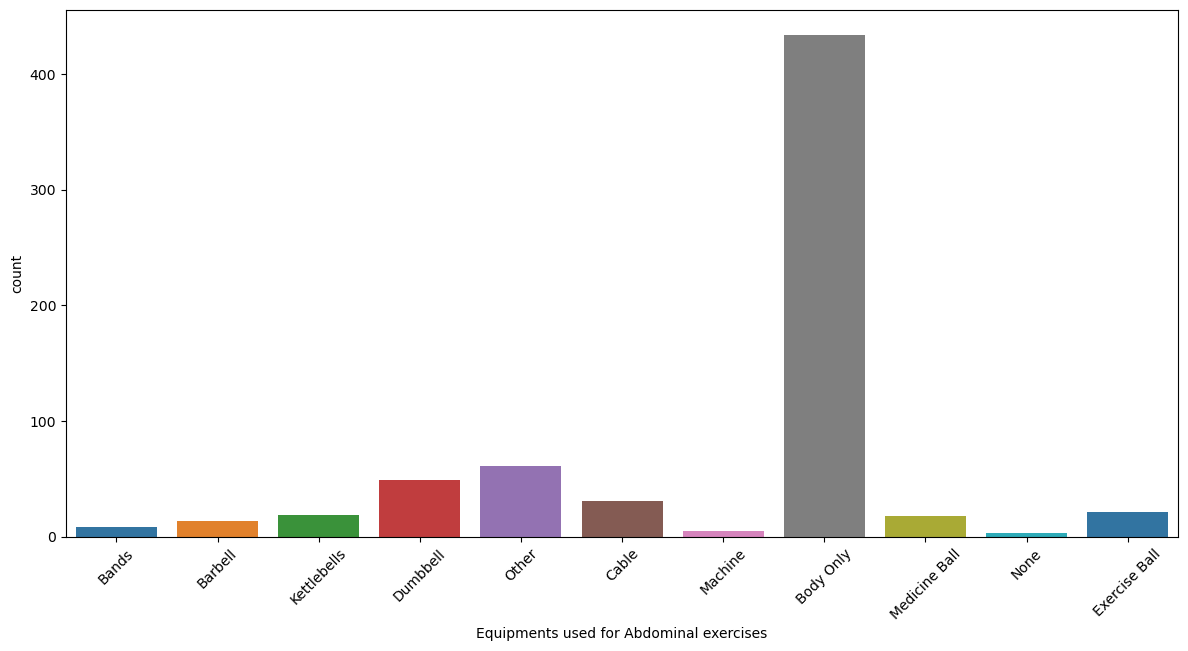

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Equipment',data=abex,palette='tab10')
plt.xlabel("Equipments used for Abdominal exercises")
plt.tight_layout()
plt.xticks(rotation=45)

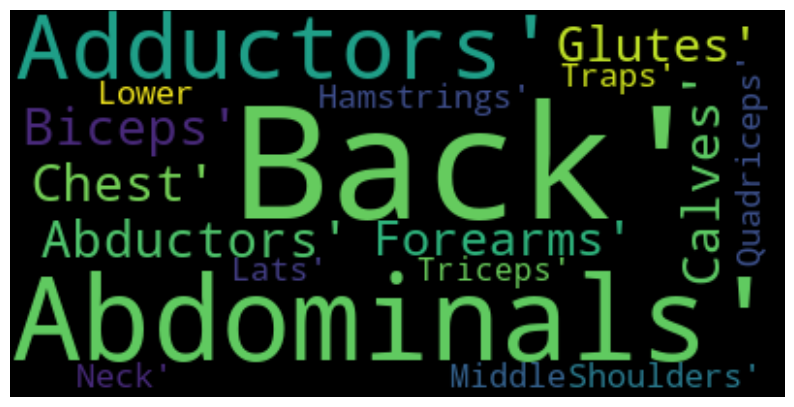

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = df["BodyPart"].unique()

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (10, 18)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
pt=abex.groupby(['Equipment']).count()
pt

,Title,Desc,Type,BodyPart,Level,Rating,RatingDesc
Equipment,,,,,,,
Bands,8,7,8,8,8,1,0
Barbell,13,11,13,13,13,7,7
Body Only,434,174,434,434,434,58,46
Cable,31,22,31,31,31,13,13
Dumbbell,49,13,49,49,49,3,3
Exercise Ball,21,17,21,21,21,4,4
Kettlebells,19,7,19,19,19,4,3
Machine,5,4,5,5,5,2,2
Medicine Ball,18,14,18,18,18,7,3


In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=abex['Equipment'], values=pt['BodyPart'])])
%matplotlib inline
fig.show()

In [18]:
abex['Equipment']

0              Bands
1              Bands
2              Bands
3              Bands
4              Bands
           ...      
657    Exercise Ball
658    Exercise Ball
659    Exercise Ball
660    Exercise Ball
661    Exercise Ball
Name: Equipment, Length: 662, dtype: object